In [1]:
import os
import cv2
import keras
import random
import numpy as np
import pandas as pd
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
root_path = 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\'

In [3]:
print(tf.__version__)

2.10.1


In [4]:
classes = sorted(os.listdir(root_path))
classes

['benign', 'malignant', 'normal']

In [5]:
single_mask_paths = sorted([sorted(glob(root_path + name + "/*mask.png")) for name in classes])
double_mask_paths = sorted([sorted(glob(root_path + name + "/*mask_1.png")) for name in classes])

In [6]:
single_mask_paths

[['D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (1)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (10)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (100)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (101)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (102)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (103)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (104)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (105)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (106)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (107)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (108)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (109)_mask.png',
  'D:\\Downloads\\Project\\Data

In [7]:
double_mask_paths

[[],
 ['D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (100)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (163)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (173)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (181)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (195)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (25)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (315)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (346)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (4)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (424)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (54)_mask_1.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (58)_mask_1.png',
  'D

In [8]:
image  = plt.imread('D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (25).png')
image = cv2.resize(image,(400,400))
mask1  = plt.imread('D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (25)_mask.png')
mask1 = cv2.resize(mask1,(400,400))
mask2  = plt.imread('D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (25)_mask_1.png')
mask2 = cv2.resize(mask2,(400,400))
mask = mask1 + mask2
mask = cv2.resize(mask,(400,400))

(-0.5, 399.5, 399.5, -0.5)

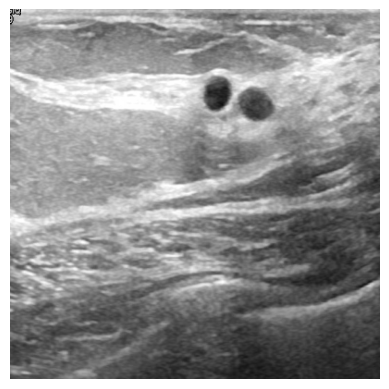

In [9]:
plt.imshow(image,cmap='gray')
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

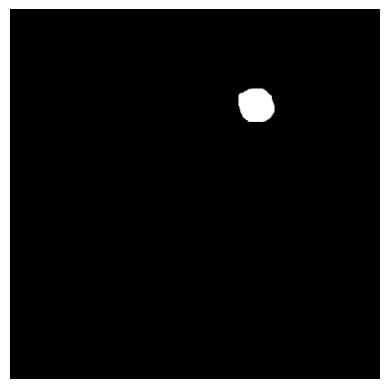

In [10]:
plt.imshow(mask1,cmap='gray')
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

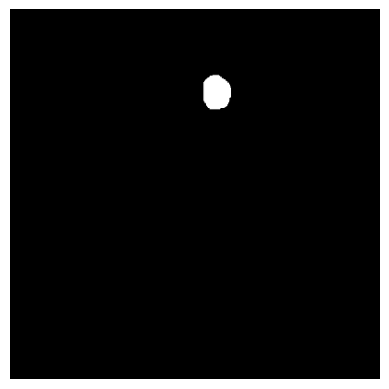

In [11]:
plt.imshow(mask2,cmap='gray')
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

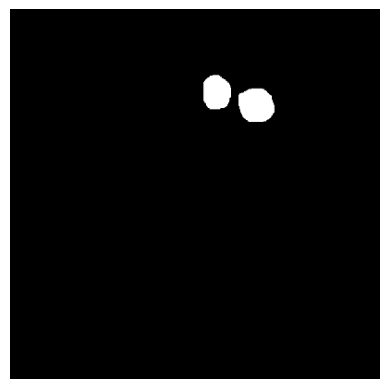

In [12]:
plt.imshow(mask,cmap='gray')
plt.axis('off')

In [13]:
image_paths = []
mask_paths = []
for class_path in single_mask_paths:
    for path in class_path:
        img_path = path.replace('_mask','')
        image_paths.append(img_path)
        mask_paths.append(path)

In [14]:
import random
combined_paths = list(zip(image_paths, mask_paths))
random.shuffle(combined_paths)

# Unzip the shuffled paths back into separate lists
image_paths, mask_paths = zip(*combined_paths)

In [15]:
image_paths

('D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (41).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\malignant\\malignant (193).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (234).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\normal\\normal (87).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\malignant\\malignant (138).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (51).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\normal\\normal (118).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (154).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (169).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (271).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (111).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\normal\\normal (105).png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (195).png',
 'D:\\Downloads\

In [16]:
mask_paths

('D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (41)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\malignant\\malignant (193)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (234)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\normal\\normal (87)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\malignant\\malignant (138)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (51)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\normal\\normal (118)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (154)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (169)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (271)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (111)_mask.png',
 'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\normal\\normal (105)_mask.png',
 'D:\\Downloads\\Project\\Datas

In [20]:
sub_image_paths = image_paths
sub_mask_paths = mask_paths

In [21]:
print(len(sub_image_paths))
print(len(sub_mask_paths))

780
780


# IMAGE RESIZING

In [22]:
def resize_image_and_mask(image_path, mask_path, new_size):
    # Load the image and mask
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image and mask
    resized_image = cv2.resize(image, new_size)
    resized_mask = cv2.resize(mask, new_size)

    return resized_image, resized_mask

In [23]:
images = []
masks = []
for image_path, mask_path in zip(sub_image_paths, sub_mask_paths):
    resized_image,resized_mask = resize_image_and_mask(image_path, mask_path, (128,128))
    images.append(resized_image)
    masks.append(resized_mask)

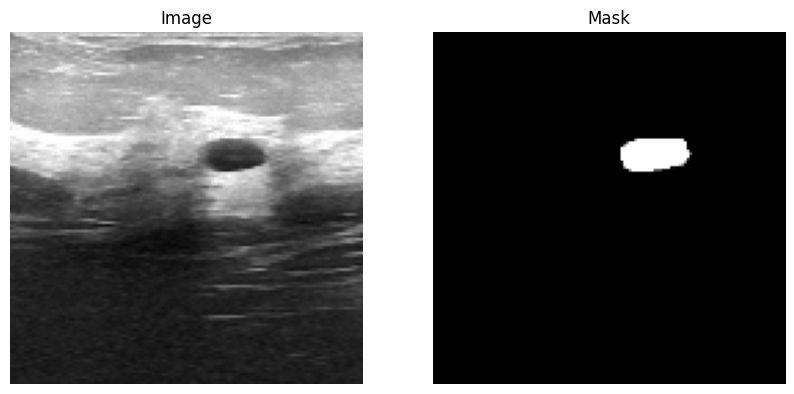

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(images[10])
axes[0].set_title('Image')
axes[0].axis('off')

# Display the first mask
axes[1].imshow(masks[10], cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')

plt.show()

In [25]:
image = cv2.imread(image_paths[0])
mask = cv2.imread(mask_paths[0], cv2.IMREAD_GRAYSCALE)
print("Before Resizing")
print("Image size:", image.shape)
print("Mask size:", mask.shape)

print("After Resizing")
print("Image size:", images[0].shape)
print("Mask size:", masks[0].shape)

Before Resizing
Image size: (484, 550, 3)
Mask size: (484, 550)
After Resizing
Image size: (128, 128, 3)
Mask size: (128, 128)


In [26]:
l = np.array(masks[0])
l = l.reshape(-1)
print(l.shape)
print(np.unique(l))
l_series = pd.Series(l)
print(l_series.value_counts())

(16384,)
[  0   3  12  33  35  36  44  46  52  53  55  71  82  91  98 100 106 116
 124 139 141 155 164 179 181 189 190 201 217 219 229 240 241 249 250 251
 254 255]
0      14905
255     1440
124        2
179        2
181        2
55         1
251        1
52         1
116        1
139        1
106        1
219        1
33         1
53         1
3          1
249        1
82         1
240        1
35         1
254        1
141        1
201        1
229        1
98         1
250        1
189        1
190        1
91         1
241        1
217        1
36         1
44         1
164        1
155        1
71         1
12         1
46         1
100        1
Name: count, dtype: int64


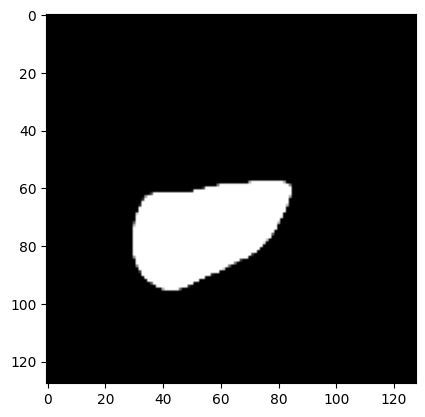

In [27]:
plt.imshow(masks[0],cmap='gray')

In [28]:
threshold_value = 127

# Convert each grayscale image to binary image
binary_image_list = []
for gray_image in masks:
    _, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
    binary_image_list.append(binary_image)
masks = binary_image_list

In [29]:
l = np.array(binary_image_list[0])
l = l.reshape(-1)
print(l.shape)
print(np.unique(l))
l_series = pd.Series(l)
print(l_series.value_counts())

(16384,)
[  0 255]
0      14924
255     1460
Name: count, dtype: int64


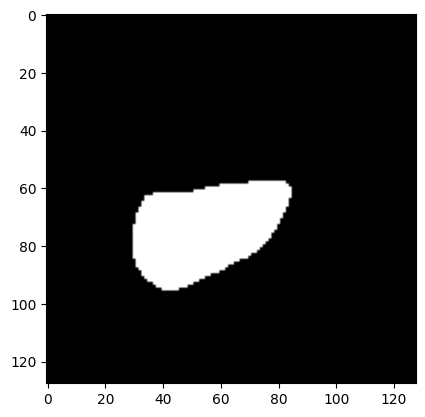

In [30]:
plt.imshow(binary_image_list[0],cmap='gray')

# NOISE REMOVAL

In [31]:
# Apply median filter to each image
median_filtered_images = []
for image in images:
    # Apply median filter with kernel size 3x3
    median_filtered_image = cv2.medianBlur(image, 3)
    median_filtered_images.append(median_filtered_image)

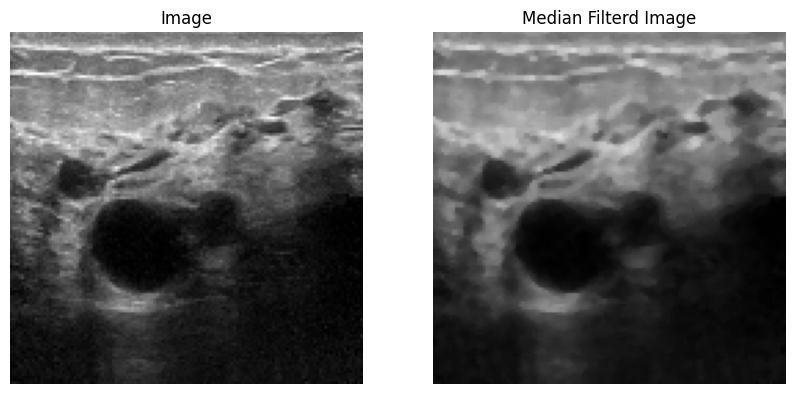

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(images[0])
axes[0].set_title('Image')
axes[0].axis('off')

axes[1].imshow(median_filtered_images[0])
axes[1].set_title('Median Filterd Image')
axes[1].axis('off')

plt.show()

In [33]:
# Define the kernel size for the Gaussian filter
kernel_size = (3, 3)  # Adjust the size as needed, should be odd

# Apply Gaussian filter to each image
gaussian_filtered_images = []
for image in images:
    # Apply Gaussian filter
    gaussian_filtered_image = cv2.GaussianBlur(image, kernel_size, 0)
    gaussian_filtered_images.append(gaussian_filtered_image)

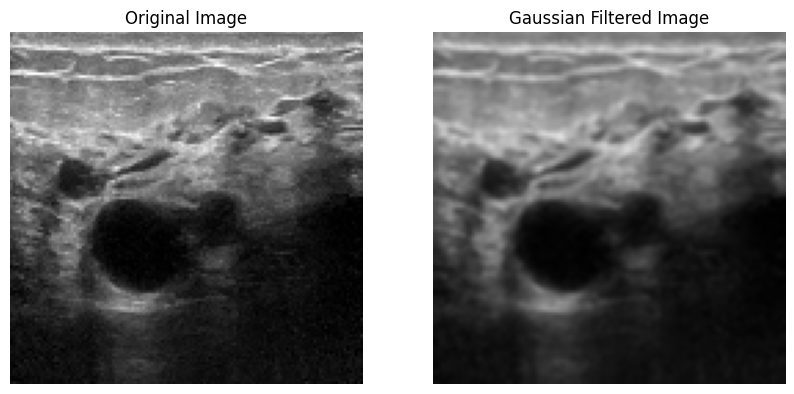

In [34]:
# Display the first image before and after applying Gaussian filter
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(images[0])
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the Gaussian filtered image
axes[1].imshow(gaussian_filtered_images[0])
axes[1].set_title('Gaussian Filtered Image')
axes[1].axis('off')

plt.show()

In [35]:
median_kernel_size = 3
gaussian_kernel_size = (3, 3)
# Apply both filters to each image
processed_images = []
for image in images:
    median_filtered_image = cv2.medianBlur(image, median_kernel_size)
    gaussian_filtered_image = cv2.GaussianBlur(median_filtered_image, gaussian_kernel_size, 0)
    processed_images.append(gaussian_filtered_image)

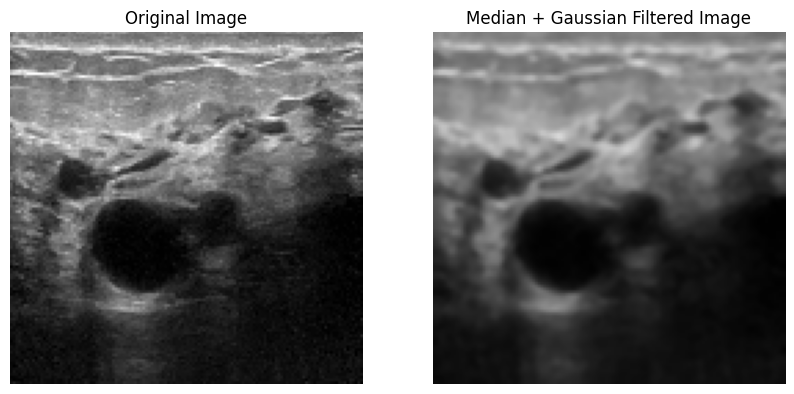

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(images[0])
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(processed_images[0])
axes[1].set_title('Median + Gaussian Filtered Image')
axes[1].axis('off')

plt.show()

# DATA AUGMENTATION

In [37]:
rotation_angle = 15
augmentation_probability = 1.0
augmented_images = []
augmented_masks = []
for image, mask in zip(processed_images, masks):
    if np.random.rand() < augmentation_probability:
        # Rotate the image
        height, width = image.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rotation_angle, 1)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)

        # Rotate the mask
        rotated_mask = cv2.warpAffine(mask, rotation_matrix, (width, height), flags=cv2.INTER_NEAREST)

        # Append the augmented image and mask
        augmented_images.append(rotated_image)
        augmented_masks.append(rotated_mask)
    augmented_images.append(image)
    augmented_masks.append(mask)

# Convert the lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_masks = np.array(augmented_masks)

In [38]:
print(len(augmented_masks))

1560


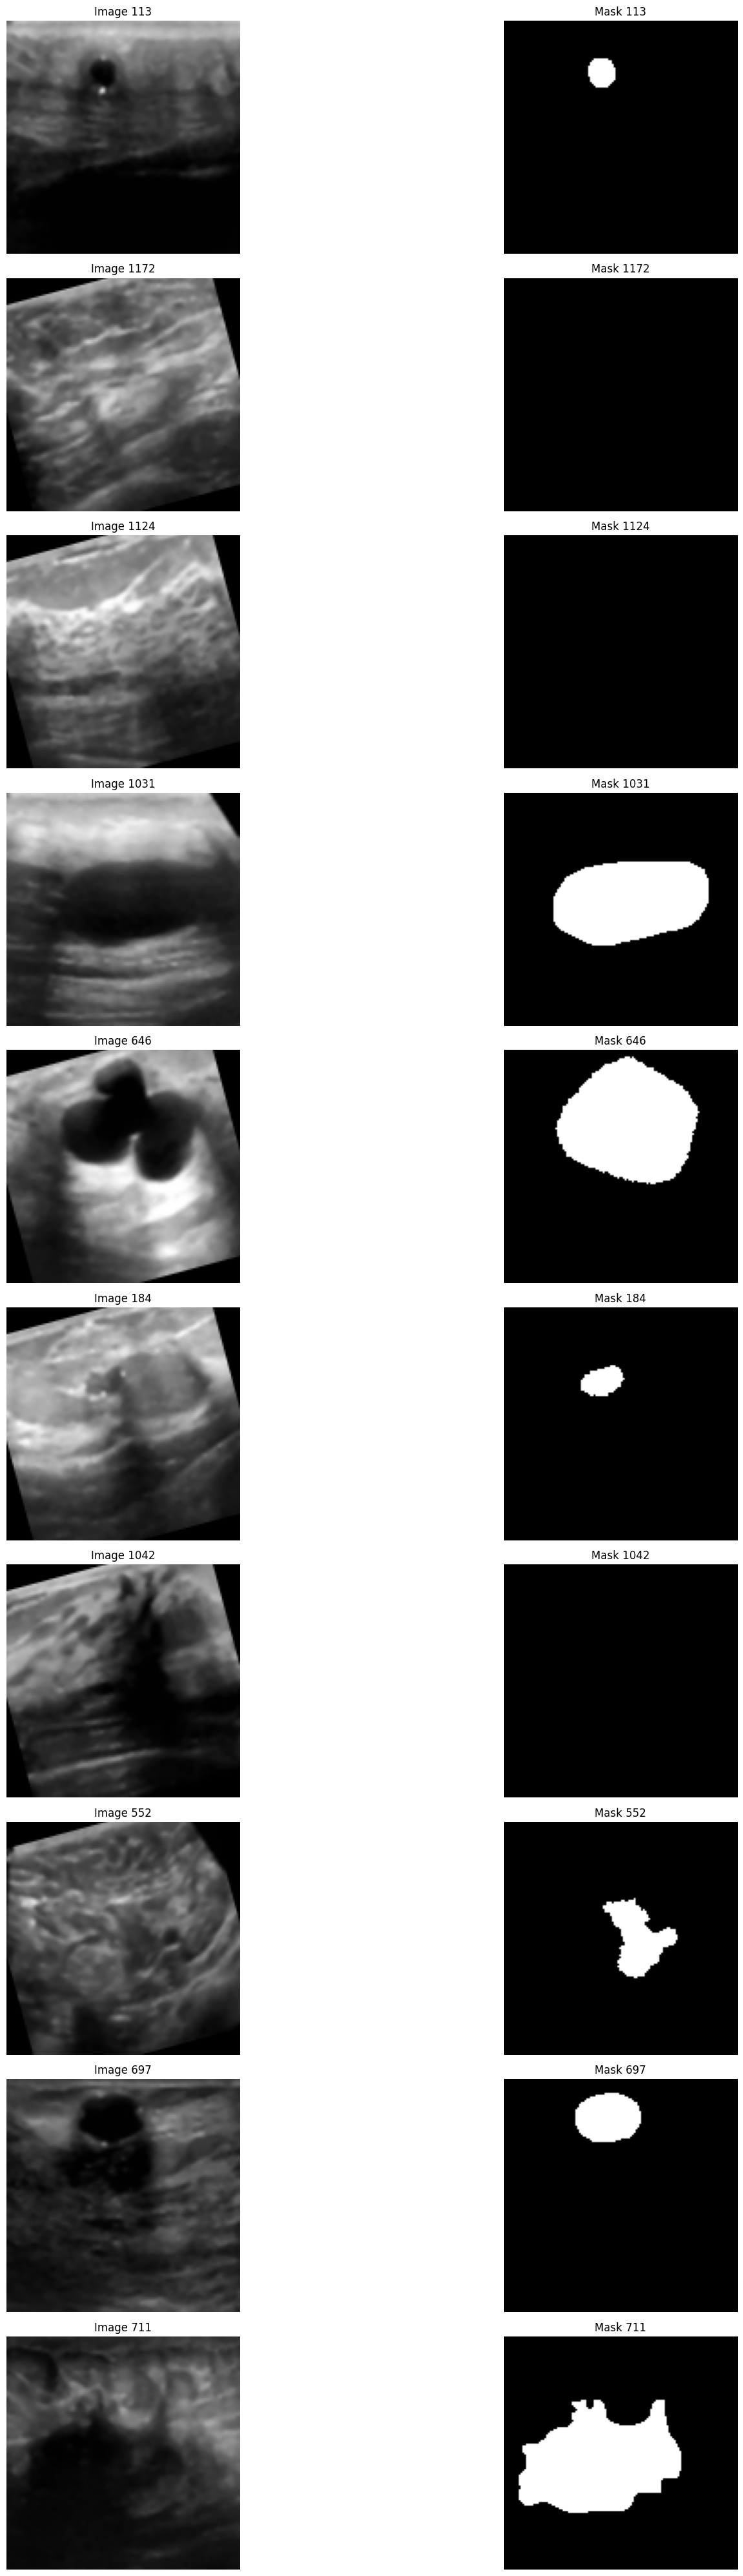

In [39]:
random_indices = random.sample(range(len(augmented_images)), 10)
fig, axes = plt.subplots(10, 2, figsize=(20, 40))
for i, idx in enumerate(random_indices):
    # Display the image
    axes[i, 0].imshow(augmented_images[idx])
    axes[i, 0].set_title('Image {}'.format(idx))
    axes[i, 0].axis('off')

    # Display the mask
    axes[i, 1].imshow(augmented_masks[idx], cmap='gray')
    axes[i, 1].set_title('Mask {}'.format(idx))
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [40]:
print("Size of augmented images array:", augmented_images.shape)
print("Size of augmented masks array:", augmented_masks.shape)

Size of augmented images array: (1560, 128, 128, 3)
Size of augmented masks array: (1560, 128, 128)


# LIGHT WEIGHT NEURAL NETWORK

In [41]:
from keras.models import Sequential, Model

In [42]:
from tensorflow.keras.models import load_model
model = load_model('best_model_128_128.h5',compile=False)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [43]:
for layer in model.layers:
	layer.trainable = False

In [47]:
X_train = np.array(augmented_images[:1404])
y_train = np.array(augmented_masks[:1404])
X_test = np.array(augmented_images[1404:])
y_test = np.array(augmented_masks[1404:])
print(X_train.shape)
print(y_train.shape)
y_train = np.expand_dims(y_train, axis=3)

(1404, 128, 128, 3)
(1404, 128, 128)


In [45]:
new_model = Model(inputs=model.input, outputs=model.get_layer('block1_conv2').output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________


In [53]:
features = new_model.predict(X_train)

1/1 [==============================] - 3s 3s/step


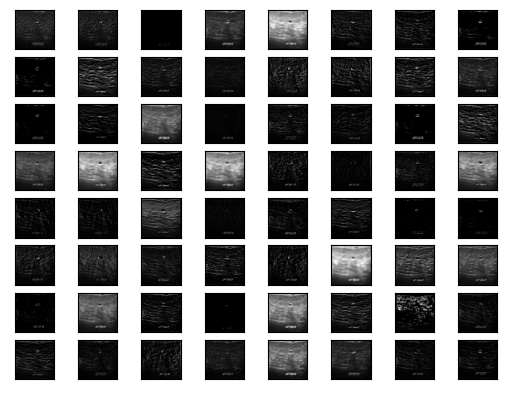

In [54]:
#Plot features to view them
square = 8
ix=1
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(features[0,:,:,ix-1], cmap='gray')
        ix +=1
plt.show()

In [55]:
X=features
X = X.reshape(-1, X.shape[3])  #Make it compatible for Random Forest and match Y labels

#Reshape Y to match X
Y = y_train.reshape(-1)

In [56]:
print(X.shape)
print(Y.shape)

(98304, 64)
(98304,)


In [57]:
dataset = pd.DataFrame(X)
dataset['Label'] = Y
print(dataset['Label'].unique())
print(dataset['Label'].value_counts())

[  0 206 158 255 221  64   5 235 137  31 111  85  41   7 163 107   4  49
  37  30 222  89 200  77  78   2  34 102 101  81  38  67 125  50  62 210
  80 121  16 229  82 141  45  44 236 146 117  65  24 186  15  47 113 109
 110 106 167  28  14  19 184  42 148 192 254  21 165 233  63 160 215  92
  79 240 138  96 153 198  29 241 193 177 112  86  56   1   3 201 149]
Label
0      94334
255     3802
85        10
113        9
149        9
       ...  
15         1
110        1
106        1
167        1
236        1
Name: count, Length: 89, dtype: int64


In [58]:
print(dataset)

                0          1         2           3            4    5  \
0      340.975861   0.000000  0.000000  140.073730   201.987350  0.0   
1       21.902094   0.000000  0.000000  207.670349   524.421143  0.0   
2        0.000000   0.000000  0.000000  234.195435   781.597534  0.0   
3      773.176575   0.000000  0.000000  356.271637   940.151062  0.0   
4      815.911560  51.163673  0.000000  380.948883  1266.997803  0.0   
...           ...        ...       ...         ...          ...  ...   
98299    0.465413   0.000000  0.261310    1.494647     7.423785  0.0   
98300    0.465413   0.000000  0.261310    1.494647     7.423785  0.0   
98301    0.465413   0.000000  0.261310    1.494647     7.423785  0.0   
98302    0.000000   0.000000  0.605773    1.734425     7.030622  0.0   
98303    3.192144   0.000000  0.000000    0.804160     5.740300  0.0   

                6           7           8           9  ...          55  \
0      208.913483   46.521080  151.710022   18.557915  ...  5

In [59]:
X_for_RF = dataset.drop(labels = ['Label'], axis=1)
Y_for_RF = dataset['Label']

In [60]:
print(X_for_RF.shape)
print(Y_for_RF.shape)

(98304, 64)
(98304,)


In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 150, random_state = 42,n_jobs=-1)
model.fit(X_for_RF, Y_for_RF)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

In [ ]:
# from joblib import dump
# dump(model, 'Random_forest_model_250.joblib')

In [ ]:
# from joblib import load
# with open('Random_forest_model_250.joblib', 'rb') as file:
#     model = load(file)

In [48]:
image_paths = [
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (1).png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (101).png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (102).png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (103).png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (39).png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\malignant\\malignant (98).png'
]

mask_paths = [
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (1)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (101)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (102)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (103)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\benign\\benign (39)_mask.png',
  'D:\\Downloads\\Project\\Dataset_BUSI_with_GT\\malignant\\malignant (98)_mask.png']

In [62]:
test_image_paths = image_paths
test_mask_paths = mask_paths

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image_and_mask(image_path, mask_path, target_size=(128, 128)):
    test_img = cv2.imread(image_path)
    test_mask = cv2.imread(mask_path, 0)
    test_img = cv2.resize(test_img, target_size)
    test_mask = cv2.resize(test_mask, target_size)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    return test_img, test_mask

def preprocess_image(test_img):
    test_img = np.expand_dims(test_img, axis=0)
    return test_img

def predict_mask(new_model, model, test_img):
    X_test_feature = new_model.predict(test_img)
    X_test_feature = X_test_feature.reshape(-1, X_test_feature.shape[3])
    prediction = model.predict(X_test_feature)
    predicted_mask = prediction.reshape((128, 128))
    return predicted_mask

def display_results(original_img, original_mask, predicted_mask):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(original_img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(original_mask, cmap='gray')
    axes[1].set_title('Original Mask')
    axes[1].axis('off')

    axes[2].imshow(predicted_mask, cmap='gray')
    axes[2].set_title('Predicted Mask')
    axes[2].axis('off')

    plt.show()

def overlay_mask(original_img, predicted_mask):
    colored_mask = cv2.merge([np.zeros_like(predicted_mask), np.zeros_like(predicted_mask), 255 * np.ones_like(predicted_mask)])
    colored_mask = cv2.bitwise_and(colored_mask, colored_mask, mask=predicted_mask)
    detected_image = cv2.addWeighted(original_img, 0.7, colored_mask, 0.3, 0)
    detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)
    plt.imshow(detected_image_rgb)
    plt.axis('off')
    plt.show()          

In [64]:
import cv2
import numpy as np

def load_mask(path):
    target_size = (128, 128)
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, target_size)
    return mask.astype(bool)

def calculate_iou(pred_mask, true_mask):
    intersection = np.logical_and(pred_mask, true_mask).sum()
    union = np.logical_or(pred_mask, true_mask).sum()
    if union == 0:  # Special case: both masks are completely black
        return 1
    iou = intersection / union
    return iou

def calculate_dice_coefficient(pred_mask, true_mask):
    intersection = np.logical_and(pred_mask, true_mask).sum()
    denominator = pred_mask.sum() + true_mask.sum()
    if denominator == 0:  # Special case: both masks are completely black
        return 1
    dice_coefficient = (2.0 * intersection) / denominator
    return dice_coefficient

def calculate_f1_score(pred_mask, true_mask):
    tp, fp, fn = calculate_tp_fp_fn(pred_mask, true_mask)
    if tp == 0 and fp == 0 and fn == 0:  # Special case: both masks are completely black
        return -1
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

def calculate_precision_recall(pred_mask, true_mask):
    tp, fp, fn = calculate_tp_fp_fn(pred_mask, true_mask)
    if tp == 0 and fp == 0 and fn == 0:  # Special case: both masks are completely black
        return -1, -1
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    return precision, recall

def calculate_accuracy(pred_mask, true_mask):
    true_positive = np.sum(np.logical_and(pred_mask, true_mask))
    true_negative = np.sum(np.logical_and(np.logical_not(pred_mask), np.logical_not(true_mask)))
    false_positive = np.sum(np.logical_and(pred_mask, np.logical_not(true_mask)))
    false_negative = np.sum(np.logical_and(np.logical_not(pred_mask), true_mask))

    total_pixels = pred_mask.size
    accuracy = (true_positive + true_negative) / total_pixels
    return accuracy

def calculate_tp_fp_fn(pred_mask, true_mask):
    tp = np.sum(np.logical_and(pred_mask, true_mask))
    fp = np.sum(np.logical_and(pred_mask, np.logical_not(true_mask)))
    fn = np.sum(np.logical_and(np.logical_not(pred_mask), true_mask))
    return tp, fp, fn

Segmentation on Testing Data
1/1 [==============================] - 0s 36ms/step
Test image : 1


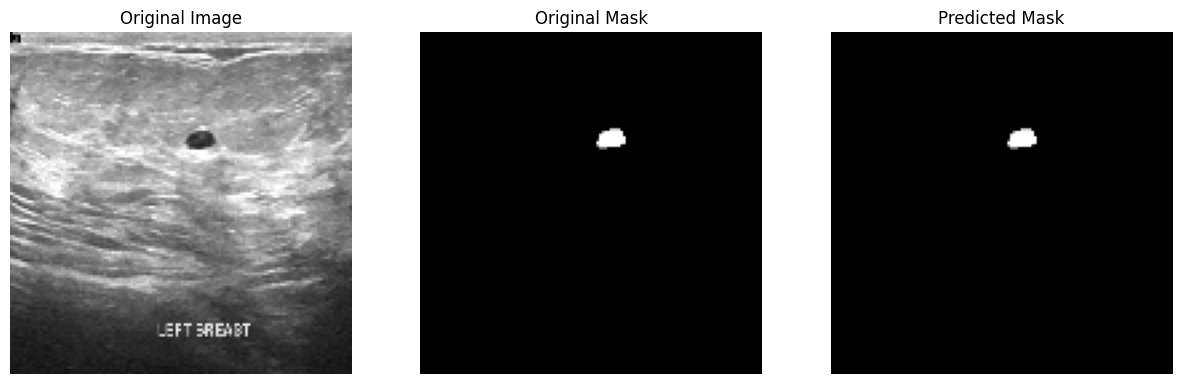

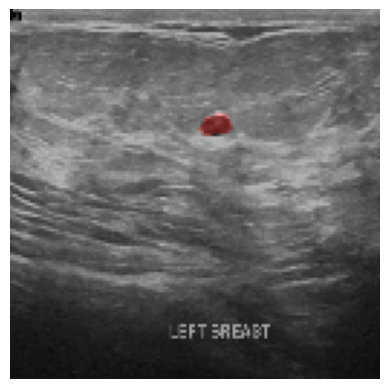

1/1 [==============================] - 0s 33ms/step
Test image : 2


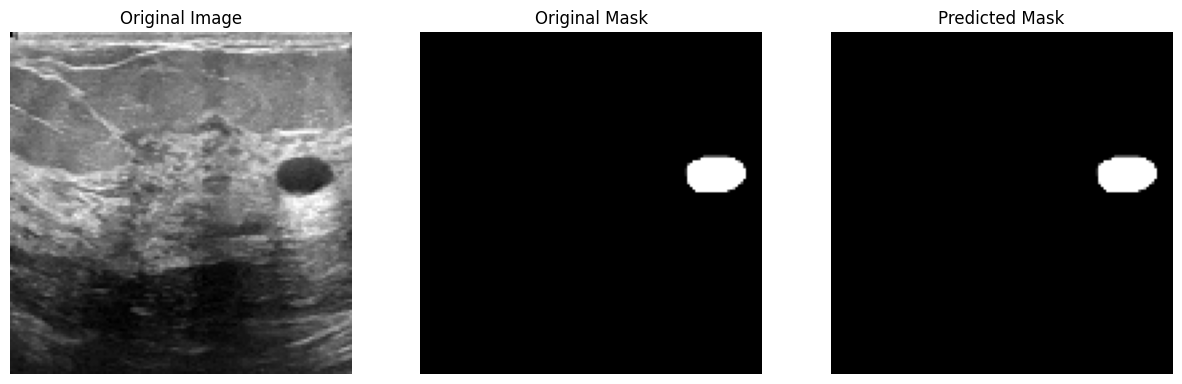

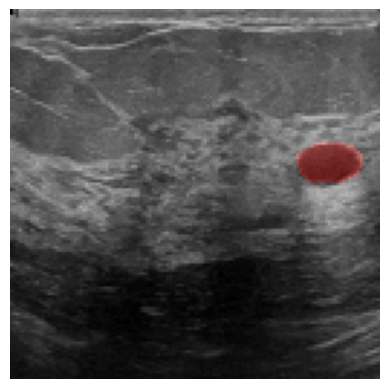

1/1 [==============================] - 0s 35ms/step
Test image : 3


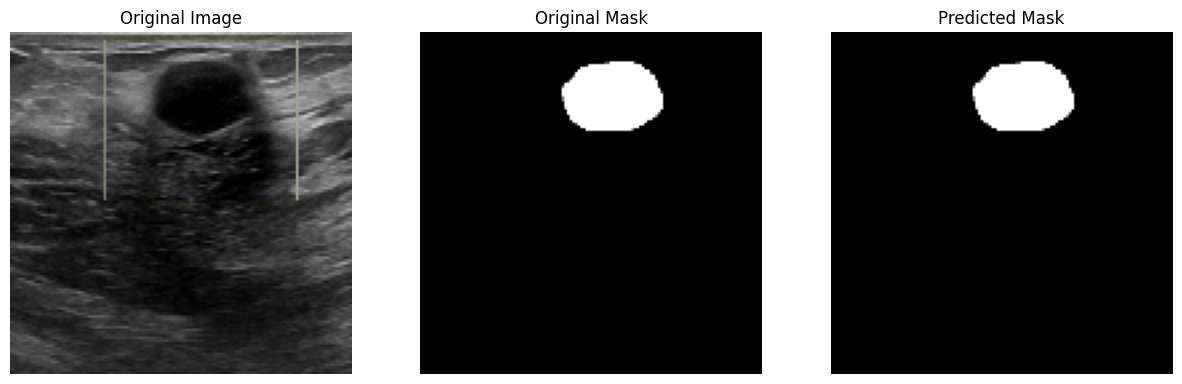

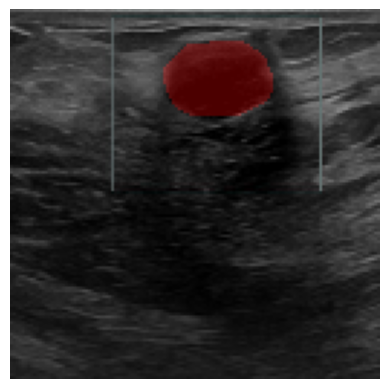

1/1 [==============================] - 0s 35ms/step
Test image : 4


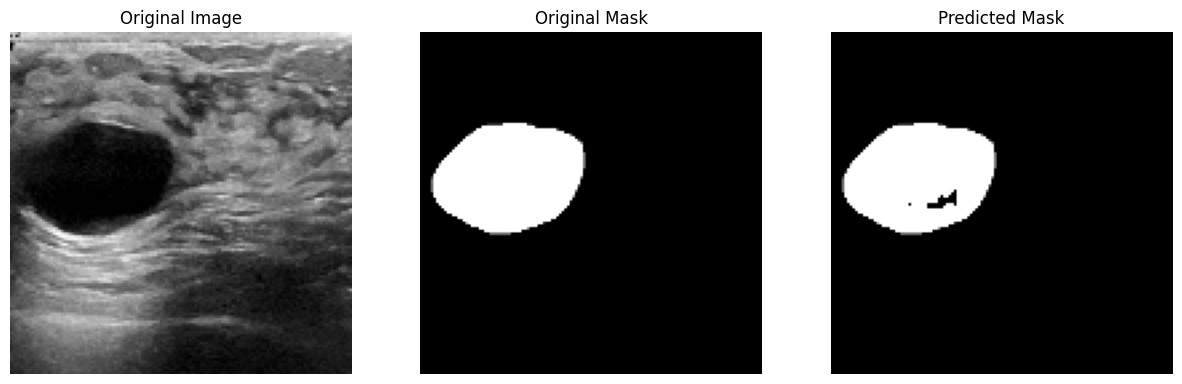

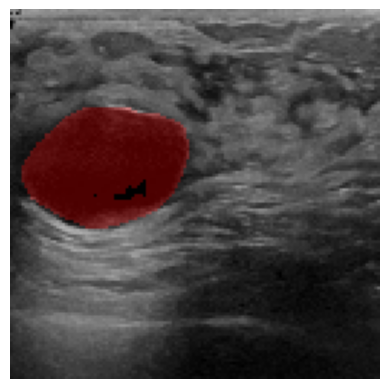

1/1 [==============================] - 0s 37ms/step
Test image : 5


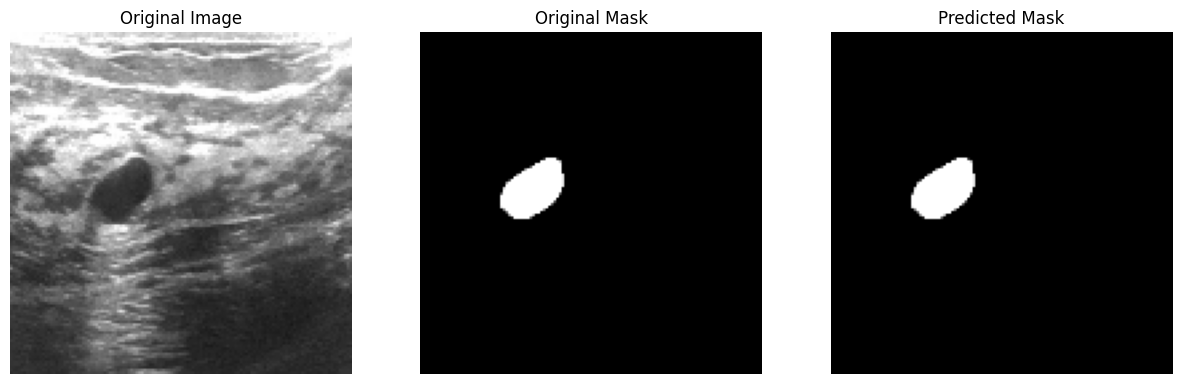

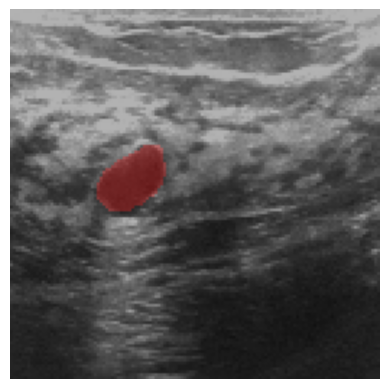

1/1 [==============================] - 0s 37ms/step
Test image : 6


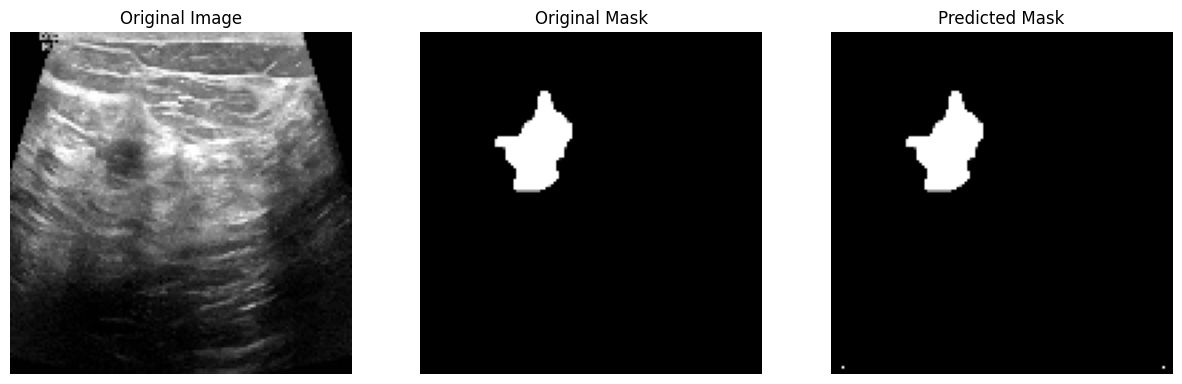

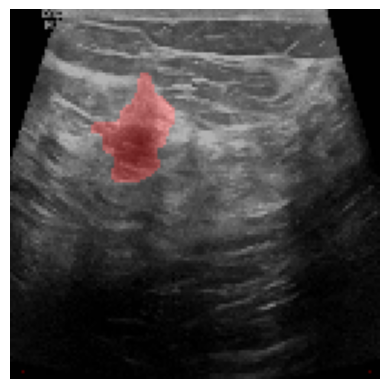

In [66]:
print("Segmentation on Testing Data")
num_images = 6
test_pred_masks = []
for i in range(num_images):
    test_img, test_mask = load_image_and_mask(test_image_paths[i], test_mask_paths[i])
    test_img_preprocessed = preprocess_image(test_img)
    predicted_mask = predict_mask(new_model, model, test_img_preprocessed)
    cv2.imwrite("predicted_mask"+str(i)+".png", predicted_mask.astype(np.uint8))
    test_pred_masks.append("predicted_mask"+str(i)+".png")
    print("Test image :",i+1)
    display_results(test_img, test_mask, predicted_mask)
    overlay_mask(test_img, predicted_mask)

In [68]:
print("----TEST DATA----")

iou_scores = []
dice_coefficients = []
f1_scores = []
precision = []
recall = []
accuracy = []
i = 1
for truth_path, pred_path in zip(test_mask_paths, test_pred_masks):
    true_mask = load_mask(truth_path)
    pred_mask = load_mask(pred_path)
    iou = calculate_iou(pred_mask, true_mask)
    iou_scores.append(iou)
    dice = calculate_dice_coefficient(pred_mask, true_mask)
    dice_coefficients.append(dice)
    f1 = calculate_f1_score(pred_mask, true_mask)
    f1_scores.append(f1)
    pr,rc = calculate_precision_recall(pred_mask, true_mask)
    precision.append(pr)
    recall.append(rc)
    acc = calculate_accuracy(pred_mask, true_mask)
    accuracy.append(acc)
    print("Image",i)
    i += 1
    print("IoU:", iou)
    print("Dice Coefficient:", dice)
    print("F1 Score:", round(f1*100,2))
    print("Precision:", round(pr*100,2))
    print("Recall:", round(rc*100,2))
    print("Accuracy:", round(acc*100,2))
    print()
    
mean_iou = np.mean(iou_scores)
mean_dice_coefficient = np.mean(dice_coefficients)
mean_f1_score = np.mean(f1_scores)
mean_precision = np.mean(precision)
mean_recall = np.mean(recall)

print("Mean IoU:", mean_iou)
print("Mean Dice Coefficient:", mean_dice_coefficient)
print("Mean F1 Score:", round(mean_f1_score*100,2))
print("Mean Precision:", round(mean_precision*100,2))
print("Mean Recall:", round(mean_recall*100,2))

----TEST DATA----
Image 1
IoU: 1.0
Dice Coefficient: 1.0
F1 Score: 100.0
Precision: 100.0
Recall: 100.0
Accuracy: 100.0

Image 2
IoU: 1.0
Dice Coefficient: 1.0
F1 Score: 100.0
Precision: 100.0
Recall: 100.0
Accuracy: 100.0

Image 3
IoU: 1.0
Dice Coefficient: 1.0
F1 Score: 100.0
Precision: 100.0
Recall: 100.0
Accuracy: 100.0

Image 4
IoU: 0.9804772234273319
Dice Coefficient: 0.9901423877327492
F1 Score: 99.01
Precision: 100.0
Recall: 98.05
Accuracy: 99.78

Image 5
IoU: 1.0
Dice Coefficient: 1.0
F1 Score: 100.0
Precision: 100.0
Recall: 100.0
Accuracy: 100.0

Image 6
IoU: 0.9966329966329966
Dice Coefficient: 0.9983136593591906
F1 Score: 99.83
Precision: 99.66
Recall: 100.0
Accuracy: 99.99

Mean IoU: 0.9961850366767214
Mean Dice Coefficient: 0.9980760078486567
Mean F1 Score: 99.81
Mean Precision: 99.94
Mean Recall: 99.67
